In [123]:
# Imports, nothing to see here
import random
import math
import sys,os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))
from spreadsheet.cell import Cell
from spreadsheet.arraySpreadsheet import ArraySpreadsheet
from spreadsheet.linkedlistSpreadsheet import LinkedListSpreadsheet
from spreadsheet.csrSpreadsheet import CSRSpreadsheet
from spreadsheet.baseSpreadsheet import BaseSpreadsheet
from time import perf_counter

In [153]:
def create_random_cells(num_cells: int, max_col:int, max_row:int) -> list[Cell]:
    """
    num_cells: number of cells you want
    max_col: maximum number of columns you want in your spreadsheet
    max_row: maximum number of rows you want in your spreadsheet
    """
    ret = ""
    ret += str(max_row-1)+" "+ str(max_col-1)+ " "+str(round(random.uniform(0.1,9.9), ndigits=2)) +"\n"
    for _ in range(num_cells):
        row = random.randint(0, max_col-1)
        col = random.randint(0, max_row-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        ret += str(row) +" "+  str(col) + " "+str(val)+"\n"
    return ret

def create_density(cells_to_generate:int, density:float):
    """
    percentage is a float of the percent of non-None cells you want, e.g. 0.1 represents 10% cells
    with non-None values.
    """
    max_rows = derive_size(cells_to_generate, density)
    max_cols = max_rows
    ret = ""
    ret+= str(max_rows-1)+" "+ str(max_cols-1)+ " "+str(round(random.uniform(0.1,9.9), ndigits=2)) +"\n"
    cells_to_make = cells_to_generate
    while cells_to_make > 0:
        row = random.randint(0, max_cols-1)
        col = random.randint(0, max_rows-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        ret += str(row) +" "+  str(col) + " "+str(val)+"\n"
        cells_to_make -=1
    return ret
def derive_size(cells_to_generate:int, density:float):
    # for some number of cells to generate and some density given, 
    #return the number of columns and rows needed for that density
    #so for 100 cells to generate at 0.1 density, we should have a max of  32ish rows and columns
    inv_density = 1/density
    dimension = math.sqrt(cells_to_generate*inv_density).__ceil__()
    return dimension

def write_to_file(cells_to_generate:int, max_col:int, max_row:int):
    file = open("sample_data.txt","w")
    file.write(create_random_cells(cells_to_generate, max_col, max_row))
    file.close()

def display_array(array: ArraySpreadsheet):
    arr =array.array 
    for x in arr:
        for y in x:
            if(y.val == None):
                print("("+str(y.row),str(y.col)+" N)", end = " ")
            else:
                print(y, end = " ")
        print() #newline
    print("finished")

def get_lCells()->list[Cell]:
    """
    basically read from the file and create a list of cells from the data from the file
    """
    try:
        lcells = []
        dataFile = open("sample_data.txt", 'r')
        for line in dataFile:
            values = line.split()
            currRow = int(values[0])
            currCol = int(values[1])
            currVal = float(values[2])
            currCell = Cell(currRow, currCol, currVal)
            # each line contains a cell
            lcells.append(currCell)
        dataFile.close()
        return lcells
    except FileNotFoundError as e:
        print("Data file doesn't exist.")

def set_up_cells(cells_to_generate, max_col, max_row):
    write_to_file(cells_to_generate, max_col, max_row)
    return get_lCells()

def test_buildSpreadSheet(spreadSheet:BaseSpreadsheet,lCells:list[Cell]):
    start_time = perf_counter()
    spreadSheet.buildSpreadsheet(lCells)
    end_time = perf_counter()
    return end_time-start_time

def test_entries(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.entries()
    end_time = perf_counter()
    return end_time-start_time

def test_update(spreadSheet:BaseSpreadsheet, rowIndex: int, colIndex:int, val:float):
    start_time = perf_counter()
    spreadSheet.update(rowIndex, colIndex,val)
    end_time = perf_counter()
    return end_time-start_time

def test_append_row(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendRow()
    end_time = perf_counter()
    return end_time-start_time

def test_append_col(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendCol()
    end_time = perf_counter()
    return end_time-start_time

def test_insert_row(spreadSheet:BaseSpreadsheet, rowIndex:int):
    start_time = perf_counter()
    spreadSheet.insertRow(rowIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_insert_col(spreadsheet:BaseSpreadsheet, colIndex:int):
    start_time = perf_counter()
    spreadsheet.insertCol(colIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_find(spreadSheet:BaseSpreadsheet, value:float):
    start_time = perf_counter()
    spreadSheet.find(value)
    end_time = perf_counter()
    return end_time-start_time

def different_densities(cells_to_generate:int):
    low = random.uniform(0.01,0.3)
    med = random.uniform(0.31,0.60)
    high = random.uniform(0.61,0.99)
    
    densities = []
    for x in [low,med,high]:
        max_rows = derive_size(cells_to_generate, x)
        max_cols = max_rows
        densities.append(create_density(cells_to_generate, x))
        print("creating: ",(max_rows*max_cols*x).__floor__()," cells for:",max_cols,"columns and ",max_rows,"rows")
    spreadsheets = []
    for x in densities:
        file = open("sample_data.txt","w")
        file.write(x)
        new_ss = ArraySpreadsheet()
        new_ss.buildSpreadsheet(get_lCells())
        spreadsheets.append(new_ss)
    return spreadsheets

In [155]:
#array of array_spreadsheets
small_spreadsheet =different_densities(500)
med_spreadsheet = different_densities(50000)
large_spreadsheet = different_densities(500000)


creating:  510  cells for: 66 columns and  66 rows
creating:  503  cells for: 38 columns and  38 rows
creating:  522  cells for: 26 columns and  26 rows
creating:  50044  cells for: 574 columns and  574 rows
creating:  50198  cells for: 364 columns and  364 rows
creating:  50159  cells for: 254 columns and  254 rows
creating:  500210  cells for: 2018 columns and  2018 rows
creating:  500725  cells for: 1170 columns and  1170 rows
creating:  500410  cells for: 872 columns and  872 rows


In [146]:
small_spreadsheets= []
for _ in range(10):
    small_spreadsheets.append(ArraySpreadsheet())
small_lCells = []
for _ in range(10):
    small_lCells.append(set_up_cells(_*500, 25, 25))

small_spreadsheet_tests = []
small_spreadsheet_tests.append([test_buildSpreadSheet(small_spreadsheets[x], small_lCells[x])*1000 for x in range(10)])
small_spreadsheet_tests.append([test_append_col(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheet_tests.append([test_append_row(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheet_tests.append([test_insert_col(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheet_tests.append([test_insert_row(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheet_tests.append([test_entries(small_spreadsheets[x])*1000 for x in range(10)])

df_small = pd.DataFrame(small_spreadsheet_tests)
df_small.columns = [500*x for x in range(1,11)]
df_small.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries"]  
df_small

,500,1000,1500,2000,2500,3000,3500,4000,4500,5000
build_spreadsheet,0.168125,0.425542,0.784209,0.894125,1.182792,1.468208,1.801250,1.941709,2.120042,2.348000
append_col,0.007458,0.007500,0.008000,0.007833,0.007834,0.006959,0.006334,0.005750,0.005708,0.006000
append_row,0.007916,0.007292,0.007166,0.007083,0.007083,0.007125,0.007125,0.007292,0.007125,0.007084
insert_col,0.079250,0.072500,0.059750,0.067167,0.053959,0.052708,0.050292,0.048083,0.046167,0.043875
insert_row,0.047917,0.042167,0.040792,0.039000,0.037291,0.036291,0.034792,0.042541,0.031833,0.030541
entries,0.048834,0.592333,0.905625,1.015458,1.153416,1.196250,1.185500,1.160250,1.171833,1.191792


In [54]:
med_spreadsheets= []
for _ in range(10):
    med_spreadsheets.append(ArraySpreadsheet())
med_lCells = []
for _ in range(10):
    med_lCells.append(set_up_cells(_*5_000, 25, 25))

med_spreadsheet_tests = []
med_spreadsheet_tests.append([test_buildSpreadSheet(med_spreadsheets[x], med_lCells[x])*1000 for x in range(10)])
med_spreadsheet_tests.append([test_append_col(med_spreadsheets[x])*1000 for x in range(10)])
med_spreadsheet_tests.append([test_append_row(med_spreadsheets[x])*1000 for x in range(10)])
med_spreadsheet_tests.append([test_insert_col(med_spreadsheets[x], x)*1000 for x in range(10)])
med_spreadsheet_tests.append([test_insert_row(med_spreadsheets[x], x)*1000 for x in range(10)])
med_spreadsheet_tests.append([test_entries(med_spreadsheets[x])*1000 for x in range(10)])

df_med = pd.DataFrame(med_spreadsheet_tests)
df_med.columns = [5000*x for x in range(1,11)]
df_med.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries"]  
df_med

,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000
build_spreadsheet,0.170167,2.599333,5.170125,7.395333,9.987375,12.582291,15.270833,17.972375,19.960208,22.494166
append_col,0.009625,0.008625,0.008542,0.008083,0.007917,0.012583,0.008208,0.008041,0.008667,0.005792
append_row,0.008708,0.007375,0.022708,0.035333,0.007208,0.007292,0.010958,0.007292,0.007250,0.008708
insert_col,0.075167,0.079000,0.071292,0.068375,0.068125,0.066917,0.069417,0.059083,0.054375,0.044375
insert_row,0.044208,0.042625,0.041375,0.039208,0.040583,0.037667,0.035541,0.034125,0.031750,0.032209
entries,0.044125,1.124875,1.155542,1.166500,1.133875,1.112333,1.142417,1.141584,1.122084,1.134667


In [55]:
large_spreadsheets= []
for _ in range(10):
    large_spreadsheets.append(ArraySpreadsheet())
large_lCells = []
for _ in range(10):
    large_lCells.append(set_up_cells(_*50_000, 25, 25))

large_spreadsheet_tests = []
large_spreadsheet_tests.append([test_buildSpreadSheet(large_spreadsheets[x], med_lCells[x])*1000 for x in range(10)])
large_spreadsheet_tests.append([test_append_col(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheet_tests.append([test_append_row(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheet_tests.append([test_insert_col(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheet_tests.append([test_insert_row(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheet_tests.append([test_entries(large_spreadsheets[x])*1000 for x in range(10)])

df_large = pd.DataFrame(med_spreadsheet_tests)
df_large.columns = [50_000*x for x in range(1,11)]
df_large.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries"]  
df_large

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000
build_spreadsheet,0.170167,2.599333,5.170125,7.395333,9.987375,12.582291,15.270833,17.972375,19.960208,22.494166
append_col,0.009625,0.008625,0.008542,0.008083,0.007917,0.012583,0.008208,0.008041,0.008667,0.005792
append_row,0.008708,0.007375,0.022708,0.035333,0.007208,0.007292,0.010958,0.007292,0.007250,0.008708
insert_col,0.075167,0.079000,0.071292,0.068375,0.068125,0.066917,0.069417,0.059083,0.054375,0.044375
insert_row,0.044208,0.042625,0.041375,0.039208,0.040583,0.037667,0.035541,0.034125,0.031750,0.032209
entries,0.044125,1.124875,1.155542,1.166500,1.133875,1.112333,1.142417,1.141584,1.122084,1.134667


In [69]:
# plt.figure()
df_large["mean"] = df_large.mean(axis=1)
df_med["mean"] = df_small.mean(axis=1)
df_small["mean"] = df_small.mean(axis=1)
df_large

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,mean
build_spreadsheet,0.170167,2.599333,5.170125,7.395333,9.987375,12.582291,15.270833,17.972375,19.960208,22.494166,11.360221
append_col,0.009625,0.008625,0.008542,0.008083,0.007917,0.012583,0.008208,0.008041,0.008667,0.005792,0.008608
append_row,0.008708,0.007375,0.022708,0.035333,0.007208,0.007292,0.010958,0.007292,0.007250,0.008708,0.012283
insert_col,0.075167,0.079000,0.071292,0.068375,0.068125,0.066917,0.069417,0.059083,0.054375,0.044375,0.065613
insert_row,0.044208,0.042625,0.041375,0.039208,0.040583,0.037667,0.035541,0.034125,0.031750,0.032209,0.037929
entries,0.044125,1.124875,1.155542,1.166500,1.133875,1.112333,1.142417,1.141584,1.122084,1.134667,1.027800


<BarContainer object of 3 artists>

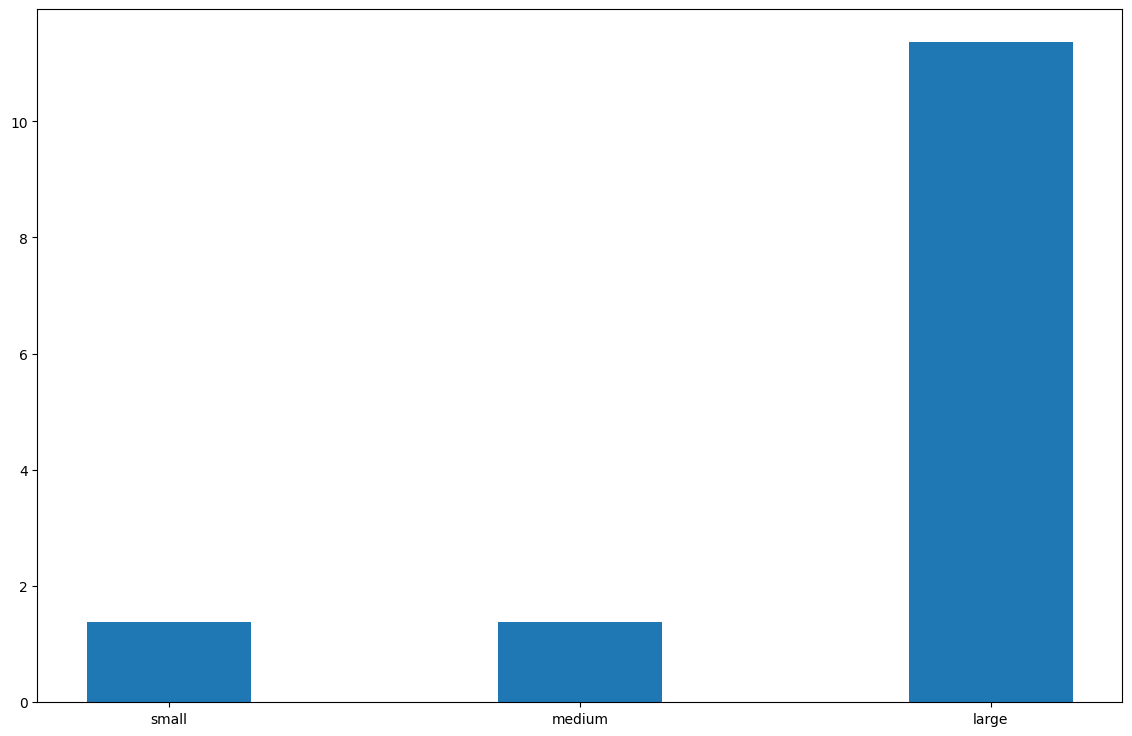

In [101]:
fig = plt.figure(figsize=(14,9))
sizes = ["small","medium","large"]
li = [df_small.iloc[0].loc["mean"], df_med.iloc[0].loc["mean"], df_large.iloc[0].loc["mean"]]

plt.bar(sizes, li, width=0.4)

In [78]:
lcellcs = get_lCells()
csr = CSRSpreadsheet()
csr.buildSpreadsheet(lcellcs)